In [149]:
from lifelines import KaplanMeierFitter
from lifelines.fitters.exponential_fitter import ExponentialFitter
from lifelines.fitters.weibull_fitter import WeibullFitter
from lifelines.datasets import load_waltons
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'


In [111]:
# My exponential survival function
def exp_func(tenure, lam=4):
    return np.exp(-tenure/lam)

# Function to get a survival time from a probability percentile (i.e. inverse of above)
def get_tenure(prob, lam=4):
    return -np.log(prob)*lam


# Genertae exponential survival data point
def get_data(prob, time_horizon):
    tenure = get_tenure(prob)
    if time_horizon < tenure:
        died = 0
        time = time_horizon
    elif time_horizon >= tenure:
        died = 1
        time = tenure
        
    return died, time


In [112]:
died = []
time = []

# Generate data in right format for 1000 people
probs = np.random.rand(1000)
time_horizons = np.random.rand(1000)*10
for n in range(len(probs)):
    d, t = get_data(probs[n], time_horizons[n])
    died.append(d)
    time.append(t)
    
# Turn this in to quantized data (i.e. subscriptions)
time_quant = []
for n in range(len(died)):
    if died == 1:
        time_quant.append(np.floor(time[n])+1)
    else:
        time_quant.append(np.floor(time[n])+1)

/Users/dominicbates/code/venv-python3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/dominicbates/code/venv-python3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/dominicbates/code/venv-python3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


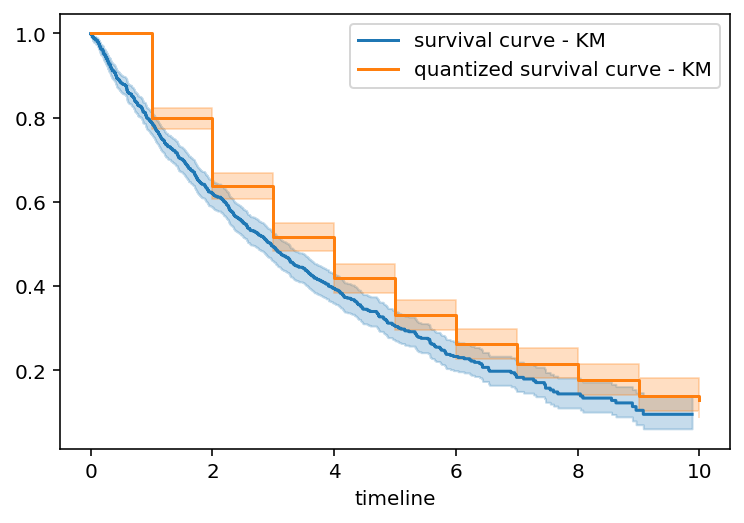

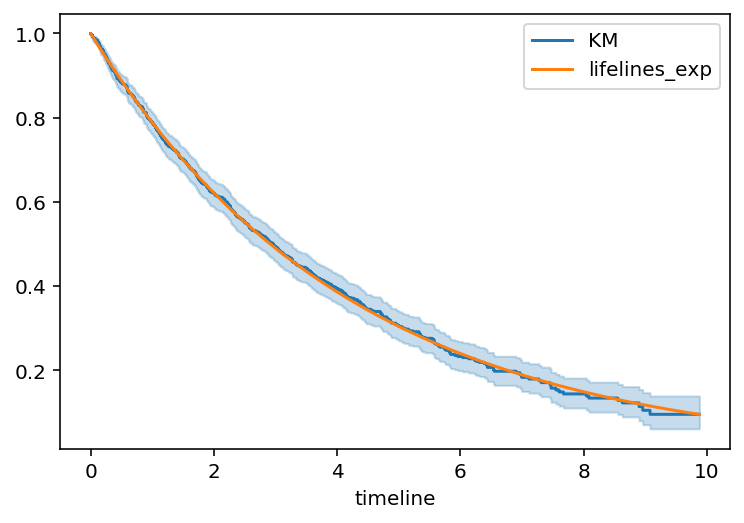

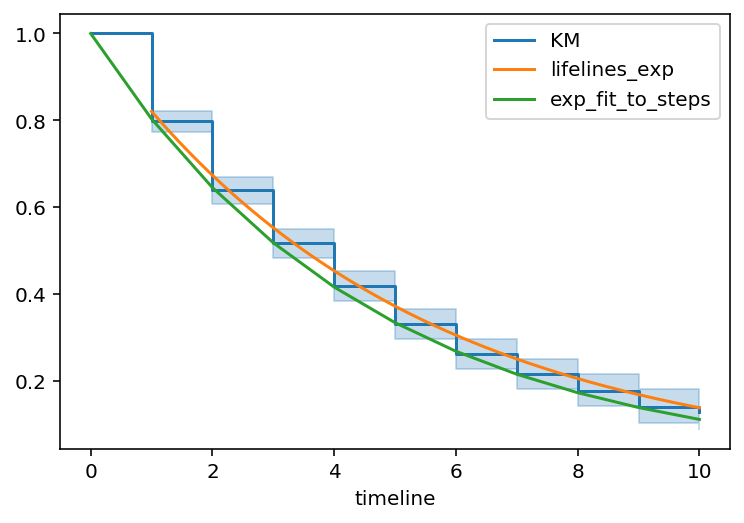

In [150]:
# Look at KM fits
plt.figure()
kmf = KaplanMeierFitter(label="survival curve - KM")
kmf.fit(time, died)
kmf.plot()

kmf = KaplanMeierFitter(label="quantized survival curve - KM")
kmf.fit(time_quant, died)
kmf.plot()



# Standard
plt.figure()
kmf = KaplanMeierFitter(label="KM")
kmf.fit(time, died)
kmf.plot()

kmf = ExponentialFitter(label="lifelines_exp")
kmf.fit(time, died)
plt.plot(kmf.survival_function_, label="lifelines_exp")

plt.legend()

## Quantised

plt.figure()
kmf = KaplanMeierFitter(label="KM")
kmf.fit(time_quant, died)
kmf.plot()

kmf = ExponentialFitter(label="lifelines_exp")
kmf.fit(time_quant, died)
plt.plot(kmf.survival_function_, label="lifelines_exp")

# kmf = WeibullFitter(label="quantized_weib")
# kmf.fit(time_quant, died)
# plt.plot(kmf.survival_function_, label="quantized_weib")
# plt.legend()

plt.plot(steps.index, fit_func(exp, steps.index, steps['quantized']), label="exp_fit_to_steps")

# plt.plot(steps.index, fit_func(weibull, steps.index, steps['quantized']), label="weib_fit_to_steps")

# plt.plot(steps.index, steps['quantized'],'k.')

plt.legend()


# fit_func(exp, steps.index, steps['quantized'])

In [130]:
kmf = KaplanMeierFitter(label="quantized")
kmf.fit(time_quant, died)
steps = kmf.survival_function_
steps

,quantized
timeline,
0.0,1.000000
1.0,0.799000
2.0,0.638976
3.0,0.517024
4.0,0.419249
5.0,0.331172
6.0,0.261907
7.0,0.215857
8.0,0.177003


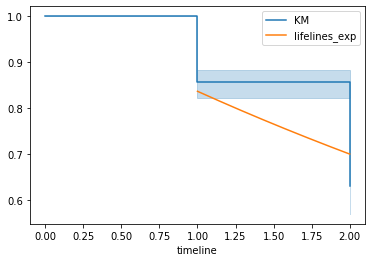

In [148]:
fake_time_2 = [1]*300 + [2]*200
fake_died_2 = [0]*200+ [1]*100 + [0]*175 + [1]*25
np.random.shuffle(fake_died_2)
# fake_died_2


plt.figure()
kmf = KaplanMeierFitter(label="KM")
kmf.fit(fake_time_2, fake_died_2)
kmf.plot()

kmf = ExponentialFitter(label="lifelines_exp")
kmf.fit(fake_time_2, fake_died_2)
plt.plot(kmf.survival_function_, label="lifelines_exp")

plt.legend()

In [126]:
def exp(t, b):
    return np.exp(-b*t)

def weibull(t, a, p):
    return np.exp(-((a*(t))**p))


def fit_func(func, x_data, y_data, max_year=12):
    popt, pcov = curve_fit(func, x_data[:(max_year+1)], y_data[:(max_year+1)],maxfev=5000)
    preds = func(x_data, *popt)
#     print(pcov)
    return preds


fit_func(exp, steps.index, steps['quantized'])

Float64Index([                1.0,   0.797516374728232,  0.6360323679596618,
               0.5072462283050023,  0.4045371730923746,  0.3226250197274378,
              0.25729873612965054,  0.2051999552602749,  0.1636503244135698,
              0.13051381344940927, 0.10408690335412962],
             dtype='float64', name='timeline')

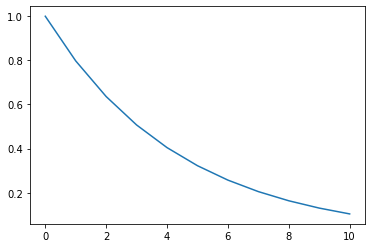

In [107]:
plt.plot(steps.index, fit_func(exp, steps.index, steps['quantized']), label="quantized_exp")
